In [1]:
from warnings import filterwarnings 
filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans

#### Read the outliers file and add a feature "prev_sold_year"

In [2]:
realtor_data_df = pd.read_csv('NewJersey-realtor-data.csv')

In [3]:
realtor_data_df["prev_sold_year"] = pd.to_datetime(realtor_data_df["prev_sold_date"], format='%Y-%m-%d').dt.year
realtor_data_df.drop(columns=['Unnamed: 0'],inplace=True)
realtor_data_df = realtor_data_df[realtor_data_df["zip_code"]<10000]

#### Create a feature that will append '0' to the zipcode feature

In [4]:
realtor_data_df.head()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price,prev_sold_year
0,for_sale,3.0,3.0,0.07,Burlington,New Jersey,8016.0,1500.0,NaN,333490.0,NaN
1,for_sale,2.0,2.0,0.11,Avenel,New Jersey,7001.0,1456.0,1987-05-20,339900.0,1987.0
2,for_sale,3.0,2.0,0.14,Avenel,New Jersey,7001.0,1542.0,2022-01-27,305100.0,2022.0
3,for_sale,3.0,1.0,0.11,Avenel,New Jersey,7001.0,925.0,NaN,205000.0,NaN
4,for_sale,NaN,NaN,0.11,Avenel,New Jersey,7001.0,NaN,2016-12-21,479000.0,2016.0


#### Get the unique zipcodes in the dataframe

In [5]:
zipcodes = realtor_data_df["zip_code"]
len(zipcodes.unique())

583

#### Read the file with Latitude and Longitude, rename the features

In [6]:
# Because of its size this dataset is not saved in the code repo for this project.
# It can be downloaded and saved in the same path to make this Notebook run.
zip_lon_lat = pd.read_csv('../../zip_lat_long.csv')
zip_lon_lat.rename(columns={"ZIP":"zip_code", "LAT":"latitude", "LNG":"longitude"},inplace=True)
zip_lon_lat.head()

,zip_code,latitude,longitude
0,601,18.180555,-66.749961
1,602,18.361945,-67.175597
2,603,18.455183,-67.119887
3,606,18.158345,-66.932911
4,610,18.295366,-67.125135


#### Find matching zipcodes that were found in the dataset

In [7]:
find_zipcodes_df = zip_lon_lat[zip_lon_lat["zip_code"].isin(zipcodes.unique())]
find_zipcodes_df.head()

,zip_code,latitude,longitude
1974,7001,40.582316,-74.271506
1975,7002,40.662338,-74.110275
1976,7003,40.809128,-74.187155
1977,7004,40.882508,-74.304593
1978,7005,40.932771,-74.417304


#### Merge the dataset with the Latitude and Longitude data

In [8]:
merge_df = realtor_data_df.merge(find_zipcodes_df, how='outer', on='zip_code')

#### Display the records that didn't match up

In [9]:
merge_df[merge_df["latitude"].isna()]

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price,prev_sold_year,latitude,longitude
13197,for_sale,3.0,3.0,NaN,Old Bridge,New Jersey,8557.0,2184.0,NaN,534900.0,NaN,NaN,NaN
13198,for_sale,4.0,3.0,0.31,Old Bridge,New Jersey,8557.0,NaN,NaN,400000.0,NaN,NaN,NaN
15081,for_sale,4.0,4.0,7.50,Stillwater,New Jersey,7875.0,NaN,NaN,899900.0,NaN,NaN,NaN
18357,for_sale,NaN,NaN,0.23,Navesink,New Jersey,7752.0,NaN,NaN,175000.0,NaN,NaN,NaN
19000,for_sale,2.0,2.0,0.01,Perth Amboy,New Jersey,8862.0,NaN,2001-02-06,219900.0,2001.0,NaN,NaN
19249,for_sale,NaN,NaN,45.60,Hope,New Jersey,7844.0,NaN,NaN,571428.0,NaN,NaN,NaN
19250,for_sale,NaN,NaN,58.40,Hope,New Jersey,7844.0,NaN,NaN,795000.0,NaN,NaN,NaN
20292,for_sale,2.0,2.0,0.01,Hillsborough,New Jersey,8444.0,1188.0,NaN,275000.0,NaN,NaN,NaN
25618,for_sale,NaN,NaN,9.16,East Amwell,New Jersey,8851.0,NaN,NaN,275000.0,NaN,NaN,NaN
29778,for_sale,4.0,2.0,NaN,Adelphia,New Jersey,7710.0,NaN,NaN,339000.0,NaN,NaN,NaN


#### Drop the records that didn't match up

In [10]:
merge_df.dropna(subset=['latitude'], inplace=True)

In [11]:
merge_df.head()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price,prev_sold_year,latitude,longitude
0,for_sale,3.0,3.0,0.07,Burlington,New Jersey,8016.0,1500.0,NaN,333490.0,NaN,40.069522,-74.824196
1,for_sale,4.0,2.0,0.26,Burlington,New Jersey,8016.0,1764.0,2018-07-17,279000.0,2018.0,40.069522,-74.824196
2,for_sale,3.0,2.0,0.22,Burlington,New Jersey,8016.0,1988.0,2016-10-24,299000.0,2016.0,40.069522,-74.824196
3,for_sale,3.0,2.0,0.20,Burlington,New Jersey,8016.0,1764.0,2020-08-23,275000.0,2020.0,40.069522,-74.824196
4,for_sale,5.0,2.0,0.05,Burlington,New Jersey,8016.0,2104.0,2007-01-24,219900.0,2007.0,40.069522,-74.824196


#### Use KMeans to cluster latitude and longitude into counties

In [12]:
numberofcounties = 21
kmeans = KMeans( init="random", n_clusters=21,random_state=0)
latlong = merge_df[["latitude","longitude"]]
kmeans.fit(latlong)
y_kmeans = kmeans.predict(latlong)

#### Plot the counties

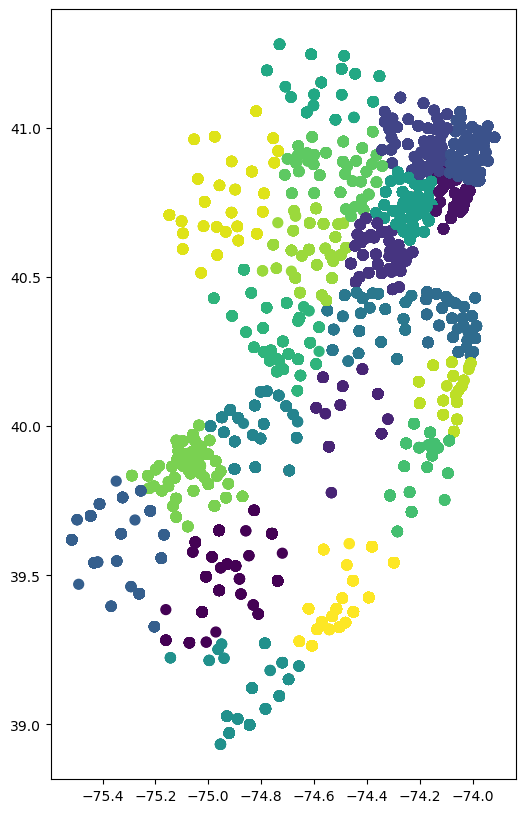

In [13]:
fig, ax = plt.subplots(figsize=(6, 10))
plt.scatter(merge_df["longitude"], merge_df["latitude"], c=y_kmeans, s=50, cmap='viridis')

#### Add county to the dataset going forward

In [14]:
merge_df["county"] = y_kmeans

In [15]:
merge_df.tail()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price,prev_sold_year,latitude,longitude,county
32595,for_sale,NaN,NaN,0.93,Greenwich Township,New Jersey,8886.0,NaN,NaN,170000.0,NaN,40.687502,-75.101127,19
32596,for_sale,NaN,NaN,0.23,Greenwich Township,New Jersey,8886.0,NaN,2021-02-18,69800.0,2021.0,40.687502,-75.101127,19
32597,for_sale,NaN,NaN,0.92,Greenwich Township,New Jersey,8886.0,NaN,NaN,170000.0,NaN,40.687502,-75.101127,19
32598,for_sale,4.0,3.0,0.31,Greenwich Township,New Jersey,8886.0,NaN,2009-07-31,459000.0,2009.0,40.687502,-75.101127,19
32599,for_sale,NaN,NaN,0.14,Greenwich Township,New Jersey,8886.0,NaN,2020-11-16,79900.0,2020.0,40.687502,-75.101127,19


#### Save the records to a csv file

In [16]:
merge_df.to_csv("geocoded.csv")